In [12]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits as pf
import astropy.units as u
import os
import glob
# This makes nice big plots for matplotlib
import matplotlib as mpl
params = {'font.size': 14,
          'figure.figsize': (15.0, 8.0),
          'lines.linewidth': 2.,
          'lines.markersize': 15,
          'animation.embed_limit': 2048,
          }
mpl.rcParams.keys()
mpl.rcParams.update(params)
np.set_printoptions(suppress=True)

import sunpy.map

data_dir_CEA = os.path.abspath(
    "/home/lazar/Fak(s)/AF/prakse/SDSA/data/3481_11923_SHARP_CEA_ld_removed")

search_criterium = "continuum"
#sufix = "_ld_removed"

data_list_CEA = sorted(glob.glob(os.path.join(data_dir_CEA, "*"+search_criterium+"*")))

In [13]:
data_list_CEA[0]

'/home/lazar/Fak(s)/AF/prakse/SDSA/data/3481_11923_SHARP_CEA_ld_removed/hmi.sharp_cea_720s.3481.20131208_111200_TAI.continuum_ld_removed.fits'

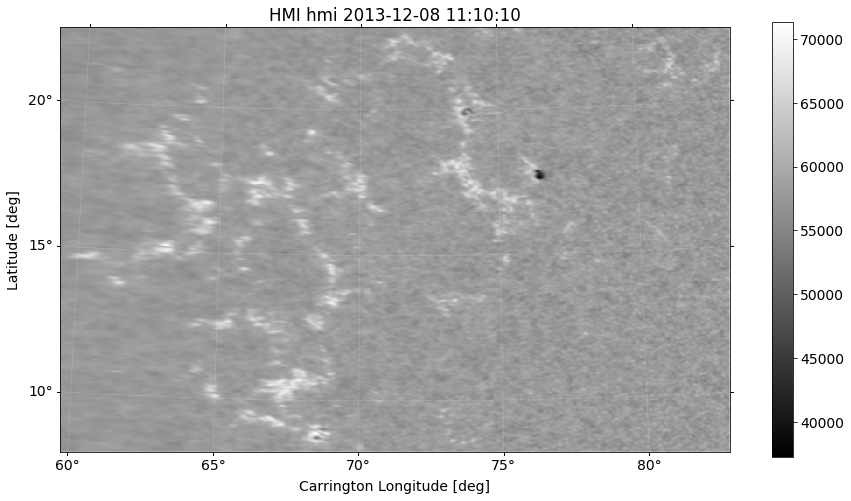

37273.29313372869

In [14]:
sp = sunpy.map.Map(data_list_CEA[0])
sp.peek()
sp.data.shape
sp.data.min()

In [15]:
#LOL YOU HAVE TO DO THIS ACTUALLY
new_dimension = u.Quantity([sp.meta["naxis1"]*2, sp.meta["naxis2"]*2], u.pixel)

#Then just resample map
new_map = sp.resample(new_dimension,method='spline')
#nearest, linear, spline return 0 on edges but neighbor returns "normal" data
#anyhow, i recommend spline, nothing will be near edges anyhow, and we will normalize it with histogram
#import numpy.ma as ma
#print(np.argwhere(new_map.data == 0).shape)
#print(new_map.data.shape)
#plt.zlim([30000])
#new_map.peek()
#new_map.save

#new_map.meta["NAXIS1"] *=2
#new_map.meta["NAXIS2"] *=2

#new_map.meta

1000


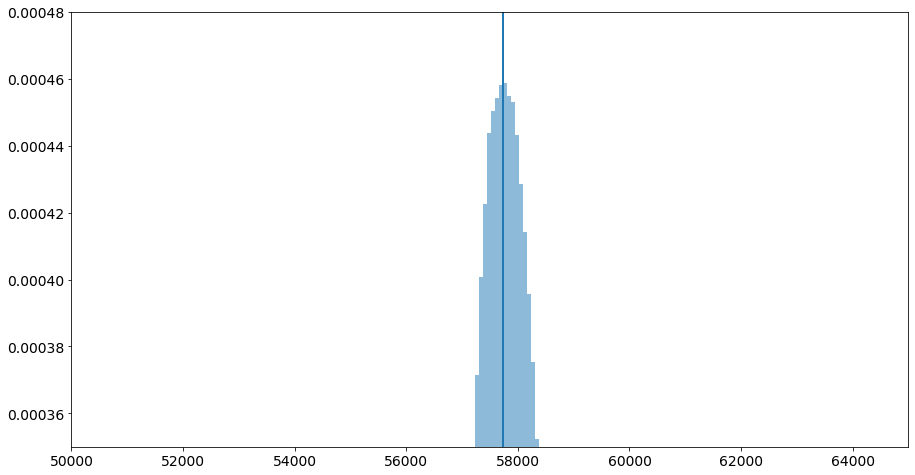

In [77]:
#Lets plot histograms of flux data between corrected and uncorrected data
plt.figure(1)
#plt.xlim([-10,1000])

plt.hist(new_map.data.flatten(), bins=1000, density=True, alpha=0.5, label='resampled')
#plt.hist(sp.data.flatten(), bins=500, density=True, alpha=0.5, label='original')


hist_org, edges_org = np.histogram(sp.data.flatten(), bins=1000, density=True)


hist_rs, edges_rs = np.histogram(new_map.data.flatten(), bins=1000, density=True)
max_rs = np.argwhere(hist_rs == np.max(hist_rs))
mbin = (edges_rs[max_rs+1]+edges_rs[max_rs])/2




print(len(edges_rs[:-1]))
plt.xlim([50000,65000])
plt.ylim([0.00035,0.00048])
#plt.plot(edges_rs[:-1], hist_rs)
plt.axvline(x=edges_rs[max_rs[0]])




#THIS IS SUPER FUN!

#https://docs.sunpy.org/en/stable/generated/gallery/plotting/Finding_Local_Peaks_in_Solar_Data.html

#playing around with 3d projections
#new_map.data.shape
#sp.data.min()
#sp.data.max()
#fig = plt.figure(figsize=(12, 8))
#ax = fig.add_subplot(111, projection='3d')
#X, Y = all_pixel_indices_from_map(new_map)
#ax.plot_surface(X, Y, new_map.data)
#ax.view_init(elev=35, azim=90)

/home/lazar/Fak(s)/AF/prakse/SDSA/hmi_data/venv/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/home/lazar/Fak(s)/AF/prakse/SDSA/hmi_data/venv/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


(array([0.00000008, 0.        , 0.00000008, 0.        , 0.        ,
        0.        , 0.00000008, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00000008, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00000008, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00000008, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00000008, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

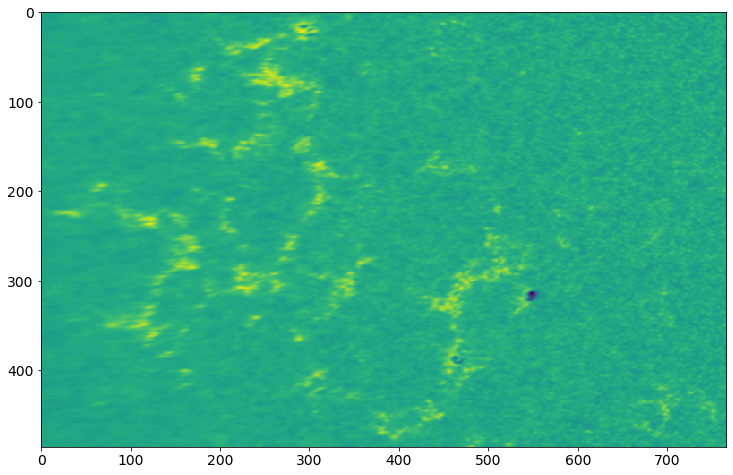

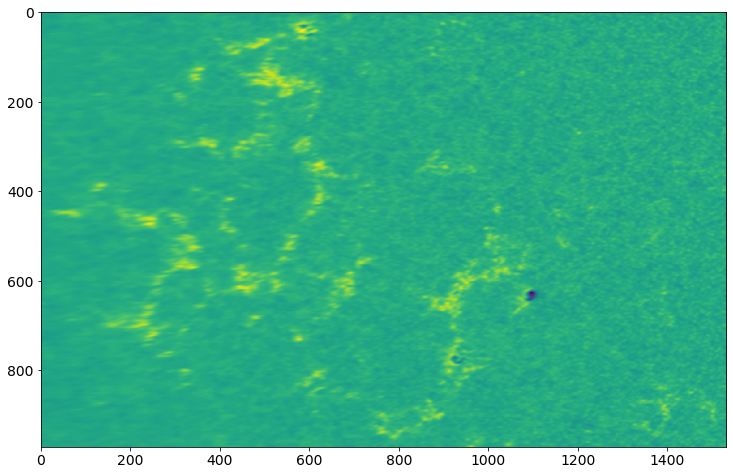

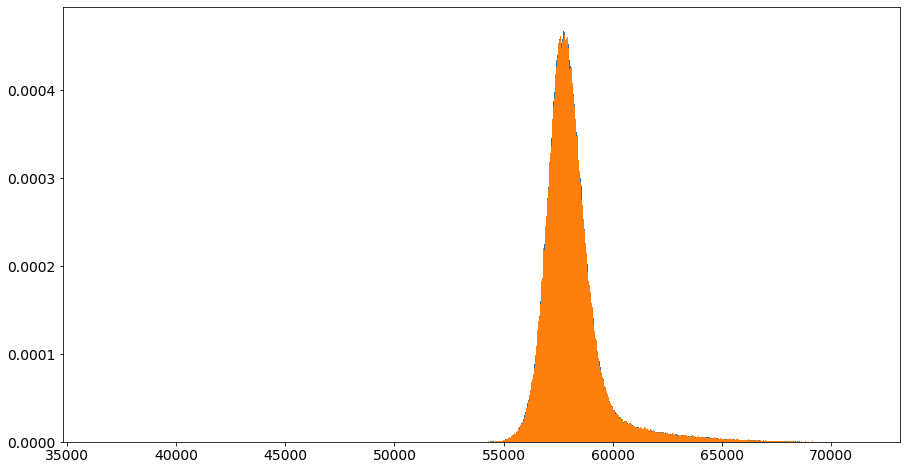

In [43]:
#hinode_map = sunpy.map.Map("../b_12_jul_2012_lvl1.02.fit")
plt.imshow(sp.data)

from scipy import interpolate
x = np.arange(0, sp.meta['naxis1'], 1)
y = np.arange(0, sp.meta['naxis2'], 1)
xx, yy = np.meshgrid(x, y)
z = sp.data
f = interpolate.interp2d(x, y, z, kind='cubic')


xnew = np.arange(0,sp.meta['naxis1'],0.5)
ynew = np.arange(0,sp.meta['naxis2'],0.5)

znew = f(xnew, ynew)

plt.figure(2)
plt.imshow(znew)

plt.figure(3)
plt.hist(znew.flatten(), bins=1000, normed=True)
plt.hist(sp.data.flatten(), bins=1000, normed=True)
#hinode_map.meta["naxis2"]
#dimensions = np.array([hinode_map.meta["naxis2"]*2, hinode_map.meta["naxis1"]*2])
#nslices = [slice(0, j) for j in list(dimensions)]

#newcoords = np.mgrid[nslices]
#print(newcoords)

#zzz = f(newcoords)

#zzz.shape

#plt.figure(2)
#plt.imshow(zzz)

In [75]:

hist_rs, edges_rs = np.histogram(new_map.data.flatten(), bins=1000, density=True)
max_rs = np.argwhere(hist_rs == np.max(hist_rs))
print(max_rs)
mbin = (edges_rs[max_rs+1]+edges_rs[max_rs])/2

print(edges_rs[max_rs])
print(hist_rs[max_rs])
print(edges_rs[max_rs+1])
print(hist_rs[max_rs+1])
print(mbin)
#len(edges_rs)

[[809]]
[[57731.5854626]]
[[0.00045882]]
[[57802.94712572]]
[[0.00045492]]
[[57767.26629416]]
